## Συλλογές

###  Λίστες τιμών, πλειάδες, σύνολα, λεξικά (ranges, tuples, sets, dictionaries)

#### Λίστες τιμών (ranges)

In [2]:
r = range(1,4)

1:4

In [3]:
r[1], r[2], r[3]

(1, 2, 3)

In [4]:
r =collect(r)

4-element Vector{Int64}:
 1
 2
 3
 4

In [5]:
r[3]=4

4

In [6]:
typeof(r)

Vector{Int64} (alias for Array{Int64, 1})

In [7]:
for i in r
    println(i)
end

1
2
4
4


In [8]:
r2 = range(0.3,8.2,10)

0.3:0.8777777777777778:8.2

In [9]:
range(0.3,8.2,length = 10)

0.3:0.8777777777777778:8.2

In [12]:
d = [2,3,"Makis", range(0,3)]
d[2]="Sakis"

"Sakis"

###  Πλειάδες

In [13]:
p = (2, "Hello", r)

(2, "Hello", [1, 2, 4, 4])

In [14]:
x, name, y = p

(2, "Hello", [1, 2, 4, 4])

In [15]:
y

4-element Vector{Int64}:
 1
 2
 4
 4

Tα στοιχεία μιας πλειάδας είναι αμετάλλακτα (immutable)!

In [16]:
p[2]="Panos"

LoadError: MethodError: no method matching setindex!(::Tuple{Int64, String, Vector{Int64}}, ::String, ::Int64)

|	          |  Mutable    | Immutable     |
|:-----------:|:-----------:|:-------------:|
Indexable	  |   Arrays	|  Ranges, Tuples     |
|Associative  | 	Dicts	|             |
| Non-indexable and non-associative|	|	Sets|

## Λεξικά (Dictionaries)

In [17]:
typeof("Gauss" => "1777-1855")

Pair{String, String}

In [18]:
mathematicians = Dict("Gauss" => "1777-1855", "Leibniz" => "1646-1716", "Cantor" => "1845-1918")

Dict{String, String} with 3 entries:
  "Cantor"  => "1845-1918"
  "Leibniz" => "1646-1716"
  "Gauss"   => "1777-1855"

In [19]:
mathematicians["Cantor"]

"1845-1918"

In [20]:
pa = collect(mathematicians)

3-element Vector{Pair{String, String}}:
  "Cantor" => "1845-1918"
 "Leibniz" => "1646-1716"
   "Gauss" => "1777-1855"

In [21]:
pa[1][2]

"1845-1918"

In [22]:
sort(collect(mathematicians))

3-element Vector{Pair{String, String}}:
  "Cantor" => "1845-1918"
   "Gauss" => "1777-1855"
 "Leibniz" => "1646-1716"

In [23]:
sort(collect(mathematicians), by = x ->x[2])

3-element Vector{Pair{String, String}}:
 "Leibniz" => "1646-1716"
   "Gauss" => "1777-1855"
  "Cantor" => "1845-1918"

In [24]:
sorted_mathematicians = Dict(sort(collect(mathematicians), by = x ->x[2]))


Dict{String, String} with 3 entries:
  "Cantor"  => "1845-1918"
  "Leibniz" => "1646-1716"
  "Gauss"   => "1777-1855"

In [25]:
p = Pair(2,"Lakis")

p[1]

2

In [26]:
p[2]

"Lakis"

In [27]:
statisticians = Dict("Galton"  => "1822-1911", "Pearson" => "1857-1936", "Kendall" => "1907-1983")

Dict{String, String} with 3 entries:
  "Galton"  => "1822-1911"
  "Pearson" => "1857-1936"
  "Kendall" => "1907-1983"

In [28]:
merge(statisticians, mathematicians)

Dict{String, String} with 6 entries:
  "Cantor"  => "1845-1918"
  "Galton"  => "1822-1911"
  "Leibniz" => "1646-1716"
  "Pearson" => "1857-1936"
  "Gauss"   => "1777-1855"
  "Kendall" => "1907-1983"

In [30]:
using JSON, HTTP

[ Info: Precompiling HTTP [cd3eb016-35fb-5094-929b-558a96fad6f3]


In [31]:
download("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_land.geojson","./land.geojson") # Download file from http://geojson.xyz/ and save it as "land.geojson"

"./land.geojson"

In [32]:
geo_data = JSON.parsefile("land.geojson")

Dict{String, Any} with 2 entries:
  "features" => Any[Dict{String, Any}("properties"=>Dict{String, Any}("scaleran…
  "type"     => "FeatureCollection"

In [33]:
geo_data["features"]

1420-element Vector{Any}:
 Dict{String, Any}("properties" => Dict{String, Any}("scalerank" => 0, "featureclass" => "Land"), "geometry" => Dict{String, Any}("coordinates" => Any[Any[Any[179.99921875, -16.168554687500006], Any[179.84824218750003, -16.30166015625001], Any[179.79384765625002, -16.37031250000001], Any[179.74814453125003, -16.4462890625], Any[179.619140625, -16.527734375], Any[179.56416015625, -16.63691406250001], Any[179.56816406250005, -16.74746093750001], Any[179.69707031250005, -16.631933593750006], Any[179.841015625, -16.5375], Any[179.8849609375, -16.51845703125001]  …  Any[179.29355468750003, -16.39863281250001], Any[179.35917968750005, -16.3798828125], Any[179.47509765625, -16.29414062500001], Any[179.5517578125, -16.24990234375001], Any[179.63525390625, -16.223242187500006], Any[179.7150390625, -16.207617187500006], Any[179.78886718750005, -16.221484375], Any[179.84814453125, -16.21425781250001], Any[180, -16.152929687500006], Any[179.99921875, -16.168554687500006]]

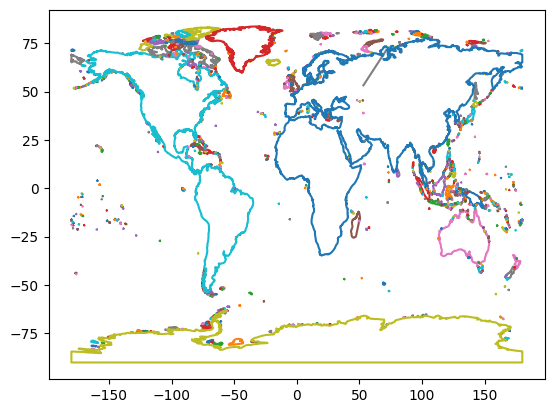

In [34]:
using PyPlot

for feature in geo_data["features"] 
    xi = []
    yi = []
   # println("Plotting ", feature["properties"]["featureclass"])
    for (x,y) in feature["geometry"]["coordinates"][1]
        append!(xi,x)
        append!(yi,y)
    end
    plot(xi, yi)
end

### Σύνολα (Sets)

In [35]:
students = Set(["Θόδωρος", "Γιάννης", "Κώστας", "Χρήστος"])

Set{String} with 4 elements:
  "Γιάννης"
  "Χρήστος"
  "Θόδωρος"
  "Κώστας"

In [36]:
prof = Set(["Γιάννης", "Μάκης"])

Set{String} with 2 elements:
  "Γιάννης"
  "Μάκης"

In [37]:
intersect(students, prof)

Set{String} with 1 element:
  "Γιάννης"

In [38]:
union(students, prof)

Set{String} with 5 elements:
  "Γιάννης"
  "Χρήστος"
  "Μάκης"
  "Θόδωρος"
  "Κώστας"

In [39]:
setdiff(students, prof)

Set{String} with 3 elements:
  "Χρήστος"
  "Θόδωρος"
  "Κώστας"

In [40]:
"Χρήστος" in students   # \in + TAB -> ∈

true

In [41]:
"Χρήστος" ∈ prof

false

In [42]:
"Χρήστος" ∉ prof   # \notin + TAB ->  ∉

true